In [1]:
gt_path = "target_result/run_0_L2_H2_DH16_DM32_mixture/mixture_ground_truth_data_6.joblib"

In [2]:
from plot_utils import gt_to_msp_fixed_ctx, load_model
from regression import run_full_regression_last_token

X_tokens, Y_beliefs, W_probs, _ = gt_to_msp_fixed_ctx(gt_path, 6)  # X:[N,L], Y:[N,S] или [N,L,S], W:[N]

/workspace-SR008.nfs2/nachevsky/simplex/epsilon-transformers/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-23 23:32:31,113 - root - INFO - Logging session started. Log file: logs/analysis_20251023_233231.log


In [3]:
run_dir = "results/20251023194824/run_0_L4_H4_DH16_DM64_mixture"
models, ckpt_paths = load_model(run_dir, ckpt='first and last')

results = run_full_regression_last_token(models[0], X_tokens, Y_beliefs, W_probs, pos=-1)

Moving model to device:  cpu
results/20251023194824/run_0_L4_H4_DH16_DM64_mixture/0.pt
Moving model to device:  cpu
results/20251023194824/run_0_L4_H4_DH16_DM64_mixture/764198400.pt
Moving model to device:  cpu
results/20251023194824/run_0_L4_H4_DH16_DM64_mixture/99878400.pt


  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:00<00:02,  2.48it/s]

RMSE: 0.31726720929145813
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:01<00:02,  1.84it/s]

RMSE: 0.34849247336387634
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:02<00:01,  1.60it/s]

RMSE: 0.3565613925457001
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:03<00:01,  1.33it/s]

RMSE: 0.3634908199310303
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.04s/it]

RMSE: 0.23914802074432373


In [4]:
results1 = run_full_regression_last_token(models[1], X_tokens, Y_beliefs, W_probs, pos=-1)

  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:01<00:02,  1.91it/s]

RMSE: 0.18300798535346985
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:01<00:02,  1.44it/s]

RMSE: 0.1304977983236313
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:02<00:02,  1.30it/s]

RMSE: 0.12586265802383423
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:03<00:01,  1.21it/s]

RMSE: 0.1246216744184494
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.20s/it]

RMSE: 0.12175683677196503


In [12]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()

9557

In [15]:
device = "cuda:6"

results2 = run_full_regression_last_token(models[2].cpu(), X_tokens, Y_beliefs, W_probs, pos=-1)

Moving model to device:  cpu


  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:01<00:02,  1.88it/s]

RMSE: 0.1769111454486847
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:02<00:02,  1.40it/s]

RMSE: 0.15504804253578186
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:02<00:02,  1.24it/s]

RMSE: 0.15414127707481384
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:03<00:01,  1.19it/s]

RMSE: 0.15388891100883484
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.19s/it]

RMSE: 0.15231773257255554


In [16]:
results

{'blocks.0.hook_resid_post': {'predicted_beliefs': tensor([[ 7.4428e-01,  2.0796e-01,  4.7800e-02,  3.3334e-01, -1.5765e-02,
            2.0484e-02],
          [ 6.7167e-01,  1.5196e-01,  1.7640e-01,  3.3334e-01, -1.6269e-02,
           -5.2201e-02],
          [ 7.6062e-01,  1.6760e-01,  7.1816e-02,  3.3334e-01,  6.9915e-02,
           -2.9591e-02],
          ...,
          [ 4.0154e-02,  5.5041e-02,  9.0489e-01,  3.3335e-01,  3.6215e-02,
           -1.2422e-01],
          [-8.4460e-02,  2.9959e-02,  1.0546e+00,  3.3334e-01,  4.0073e-02,
           -3.6694e-02],
          [ 1.1992e-01, -1.3681e-01,  1.0170e+00,  3.3335e-01, -5.0226e-02,
            6.6599e-04]]),
  'rmse': 0.31726720929145813,
  'mae': 0.5538718104362488,
  'r2': 0.8124886751174927,
  'dist': 0.2923046350479126,
  'mse': 0.10065847635269165,
  'cum_var_exp': None,
  'cum_var_exp_zscore': None,
  'val_loss_mean': nan},
 'blocks.1.hook_resid_post': {'predicted_beliefs': tensor([[ 0.6707,  0.3125,  0.0167,  0.3333, -0.005

In [17]:
import numpy as np

def weighted_reservoir_sample_indices(probs, k, rng=None):
    # probs: 1D np.array >0 (не нужно нормировать)
    rng = np.random.default_rng(rng)
    u = rng.random(len(probs))
    # ключи в лог-форме: key = log(u)/w, берём k наибольших (меньше по модулю отриц.)
    keys = np.log(u) / probs
    idx = np.argpartition(keys, kth=-k)[-k:]  # без полной сортировки
    # опционально отсортировать по ключам (не обязательно)
    return idx

In [137]:
pred = results1["combined"]['predicted_beliefs'].float().cpu()
#blocks.3.hook_resid_post
beliefs = torch.as_tensor(Y_beliefs).float().cpu()
probs   = torch.as_tensor(W_probs).float().cpu()
probs = probs / probs.sum()



idx = weighted_reservoir_sample_indices(probs.numpy().astype(np.float32), k=50_000)

In [160]:
import joblib, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def alpha_from_probs(w, min_alpha=0.15, mode="cbrt"):
    w = np.clip(w / (w.max() + 1e-8), 0, 1)
    if mode == "cbrt": a = np.cbrt(w)
    elif mode == "sqrt": a = np.sqrt(w)
    elif mode == "log": a = np.log1p(w*100)/np.log1p(100)
    else: a = w
    return a*(1-min_alpha)+min_alpha

def normalize(v):
    v = np.asarray(v); mn, mx = np.nanmin(v), np.nanmax(v)
    return (v - mn)/(mx - mn + 1e-8)


bel_s  = beliefs[idx].numpy().astype(np.float32)
pca = PCA(n_components=4).fit(bel_s)



In [161]:
pred_s = pred[idx].numpy().astype(np.float32)             # [K, D]
bel_s  = beliefs[idx]                                     # [K, S]
pr_s   = probs[idx]                                       # [K]

A = alpha_from_probs(pr_s)  

/tmp/ipykernel_3904940/3367126905.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if mode == "cbrt": a = np.cbrt(w)


In [162]:
pred_pca = PCA(n_components=4).fit(pred_s)
Z = pred_pca.transform(pred_s) 

In [163]:
bel_s  = beliefs[idx].numpy().astype(np.float32)
pca = PCA(n_components=6).fit(bel_s)


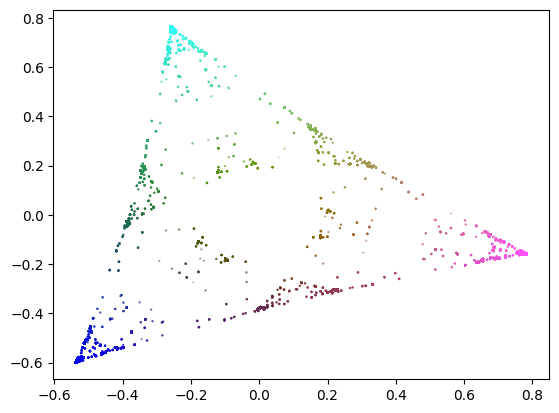

In [164]:
pca = PCA(n_components=3).fit(bel_s)

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
omni_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=omni_colors, marker='.')


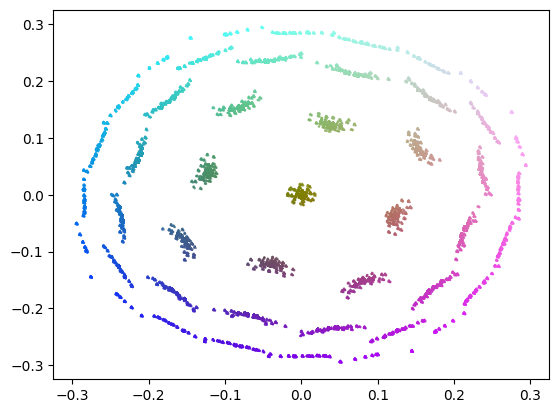

In [166]:
pca = PCA(n_components=4).fit(bel_s)

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
omni_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=omni_colors, marker='.')


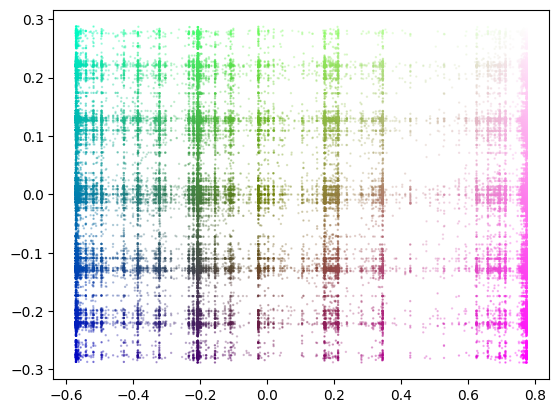

In [149]:
xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,2]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
omni_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=omni_colors, marker='.')


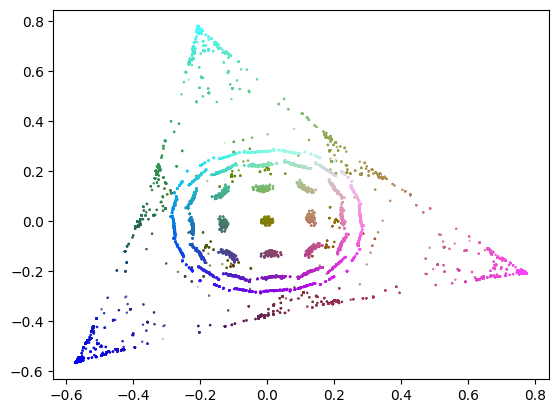

In [142]:
xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
tri_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=tri_colors, marker='.')

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
b_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=b_colors, marker='.')
# plt.plot()

In [167]:
pred = results1["combined"]['predicted_beliefs'].float().cpu()
#blocks.3.hook_resid_post
beliefs = torch.as_tensor(Y_beliefs).float().cpu()
probs   = torch.as_tensor(W_probs).float().cpu()
probs = probs / probs.sum()



idx = weighted_reservoir_sample_indices(probs.numpy().astype(np.float32), k=50_000)

In [168]:
pred_s = pred[idx].numpy().astype(np.float32)             # [K, D]
bel_s  = beliefs[idx]                                     # [K, S]
pr_s   = probs[idx]                                       # [K]

A = alpha_from_probs(pr_s) 

/tmp/ipykernel_3904940/3367126905.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if mode == "cbrt": a = np.cbrt(w)


In [171]:
pca = PCA(n_components=4).fit(bel_s)

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
tri_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)

x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
b_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)

In [172]:
pred_pca = PCA(n_components=5).fit(pred_s)
Z = pred_pca.transform(pred_s) 

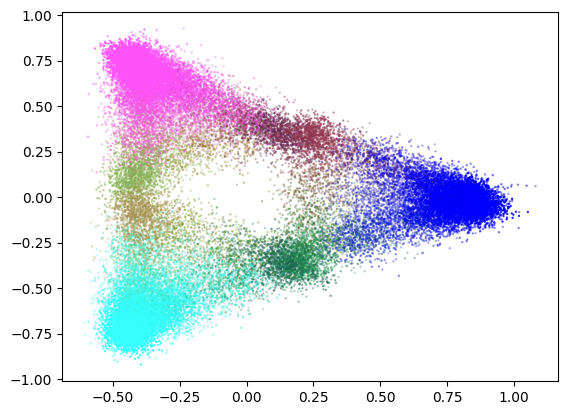

In [158]:
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')

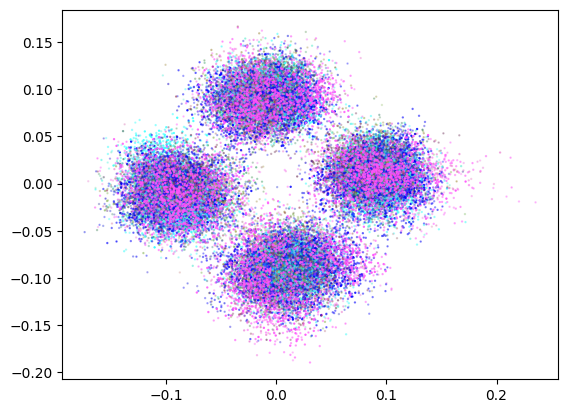

In [159]:
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=tri_colors, marker='.')

In [143]:
pred_pca = PCA(n_components=6).fit(pred_s)
Z = pred_pca.transform(pred_s) 

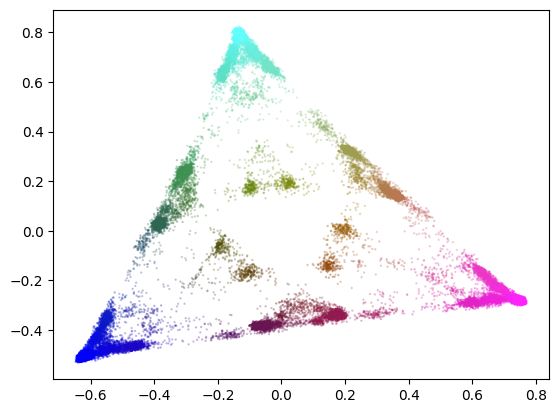

In [173]:
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')

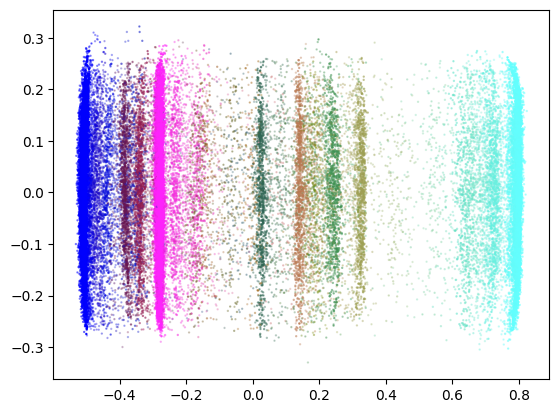

In [174]:
plt.scatter(Z[:, 1], Z[:, 2], s=2.0, c=tri_colors, marker='.')

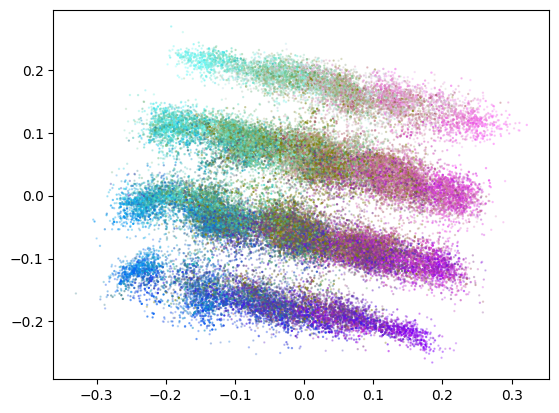

In [176]:
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=b_colors, marker='.')

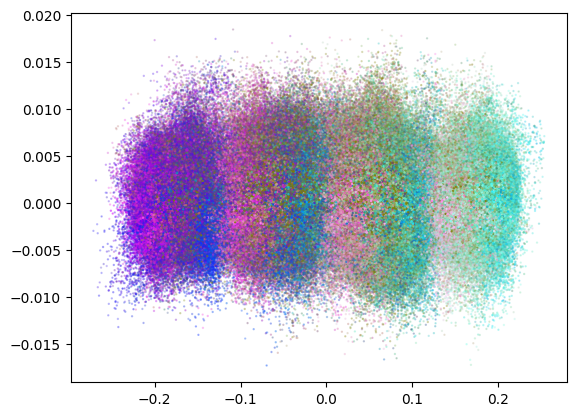

In [85]:
plt.scatter(Z[:, 3], Z[:, 4], s=2.0, c=b_colors, marker='.')

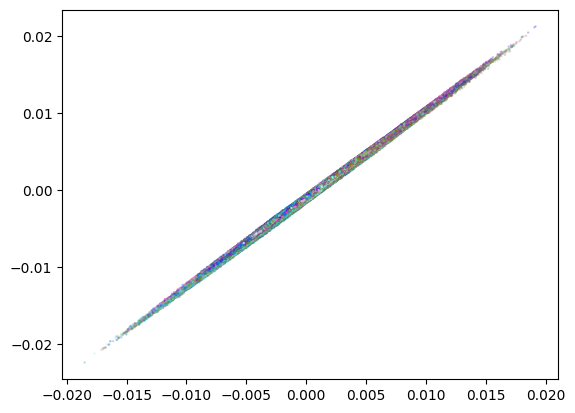

In [61]:
plt.scatter(Z[:, 4], Z[:, 5], s=2.0, c=colors, marker='.')

In [90]:
pred = results1["blocks.3.hook_resid_post"]['predicted_beliefs'].float().cpu()
#blocks.3.hook_resid_post
beliefs = torch.as_tensor(Y_beliefs).float().cpu()
probs   = torch.as_tensor(W_probs).float().cpu()
probs = probs / probs.sum()

# Взвешенная выборка до K точек (например 100k)
K = min(400_000, pred.shape[0])

idx = weighted_reservoir_sample_indices(probs.numpy().astype(np.float32), k=1000_000)

In [92]:
pred_s = pred[idx].numpy().astype(np.float32)             # [K, D]
bel_s  = beliefs[idx]                                     # [K, S]
pr_s   = probs[idx]                                       # [K]

A = alpha_from_probs(pr_s) 

pca = PCA(n_components=6).fit(bel_s)

/tmp/ipykernel_3904940/3367126905.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if mode == "cbrt": a = np.cbrt(w)


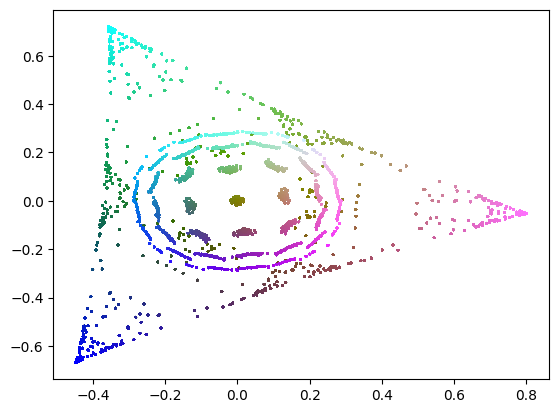

In [101]:
xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
tri_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=tri_colors, marker='.')

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
b_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=b_colors, marker='.')
# plt.plot()

In [102]:
pred_pca = PCA(n_components=4).fit(pred_s)
Z = pred_pca.transform(pred_s) 

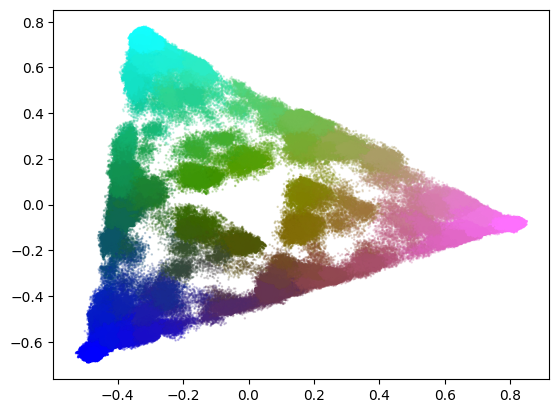

In [103]:
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')

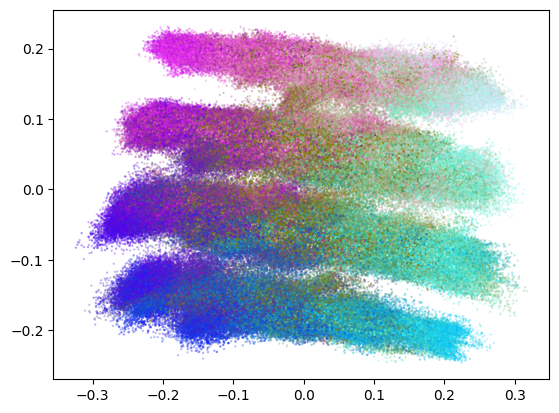

In [104]:
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=b_colors, marker='.')

# Greater batch 

In [179]:

run_dir = "results/20251024003045/run_0_L4_H4_DH16_DM64_mixture"
models, ckpt_paths = load_model(run_dir, ckpt='first and last')

results = run_full_regression_last_token(models[1], X_tokens, Y_beliefs, W_probs, pos=-1)

Moving model to device:  cpu
results/20251024003045/run_0_L4_H4_DH16_DM64_mixture/0.pt
Moving model to device:  cpu
results/20251024003045/run_0_L4_H4_DH16_DM64_mixture/4426137600.pt
Moving model to device:  cpu
results/20251024003045/run_0_L4_H4_DH16_DM64_mixture/985497600.pt


  0%|                                                        | 0/7 [00:00<?, ?it/s]

blocks.0.hook_resid_pre
blocks.0.hook_resid_post


 29%|█████████████▋                                  | 2/7 [00:00<00:02,  2.32it/s]

RMSE: 0.16159802675247192
blocks.1.hook_resid_post


 43%|████████████████████▌                           | 3/7 [00:01<00:02,  1.60it/s]

RMSE: 0.1155533567070961
blocks.2.hook_resid_post


 57%|███████████████████████████▍                    | 4/7 [00:02<00:02,  1.40it/s]

RMSE: 0.06467275321483612
blocks.3.hook_resid_post


 71%|██████████████████████████████████▎             | 5/7 [00:03<00:01,  1.28it/s]

RMSE: 0.037395939230918884
ln_final.hook_normalized
combined


100%|████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]

RMSE: 0.025380652397871017


In [198]:
pred = results["combined"]['predicted_beliefs'].float().cpu()
#blocks.3.hook_resid_post
beliefs = torch.as_tensor(Y_beliefs).float().cpu()
probs   = torch.as_tensor(W_probs).float().cpu()
probs = probs / probs.sum()



idx = weighted_reservoir_sample_indices(probs.numpy().astype(np.float32), k=50_000)

pred_s = pred[idx].numpy().astype(np.float32)             # [K, D]
bel_s  = beliefs[idx]                                     # [K, S]
pr_s   = probs[idx]                                       # [K]

A = alpha_from_probs(pr_s) 

pca = PCA(n_components=4).fit(bel_s)

/tmp/ipykernel_3904940/3367126905.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if mode == "cbrt": a = np.cbrt(w)


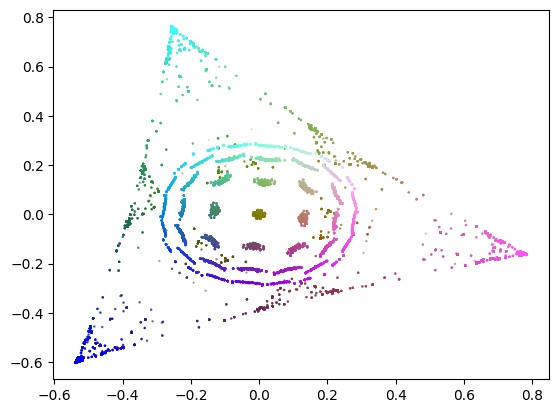

In [199]:
xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
tri_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=tri_colors, marker='.')

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
b_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=b_colors, marker='.')

In [200]:
pred_pca = PCA(n_components=5).fit(pred_s)
Z = pred_pca.transform(pred_s) 

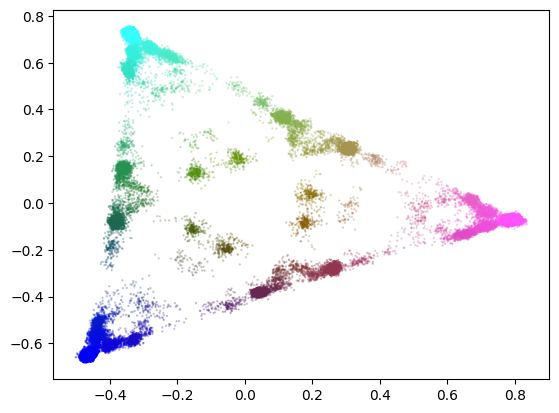

In [201]:
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')

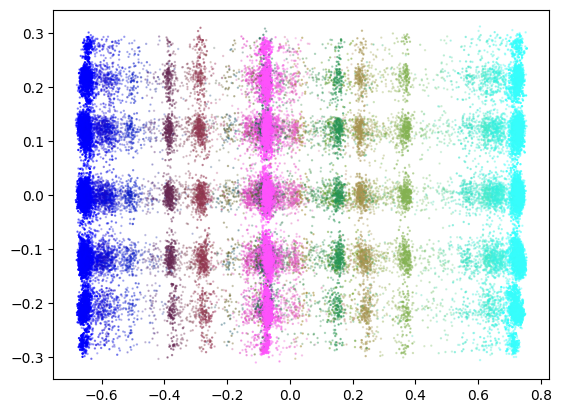

In [202]:
plt.scatter(Z[:, 1], Z[:, 2], s=2.0, c=tri_colors, marker='.')

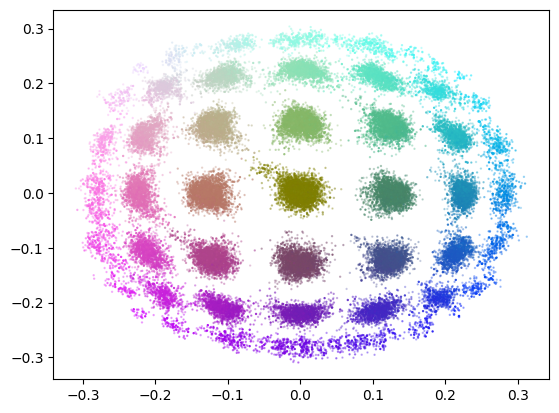

In [203]:
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=b_colors, marker='.')

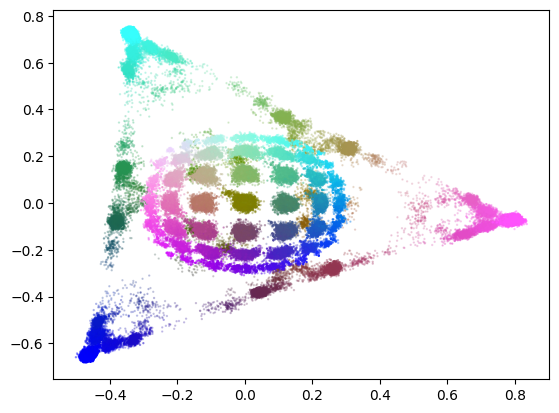

In [205]:
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=b_colors, marker='.')

/tmp/ipykernel_3904940/3367126905.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if mode == "cbrt": a = np.cbrt(w)


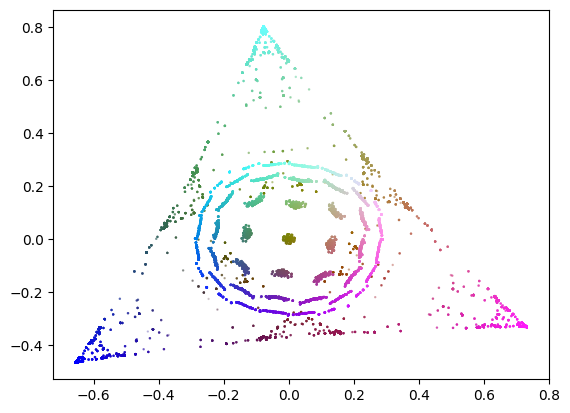

In [208]:
pred = results["blocks.3.hook_resid_post"]['predicted_beliefs'].float().cpu()
#blocks.3.hook_resid_post
beliefs = torch.as_tensor(Y_beliefs).float().cpu()
probs   = torch.as_tensor(W_probs).float().cpu()
probs = probs / probs.sum()



idx = weighted_reservoir_sample_indices(probs.numpy().astype(np.float32), k=50_000)

pred_s = pred[idx].numpy().astype(np.float32)             # [K, D]
bel_s  = beliefs[idx]                                     # [K, S]
pr_s   = probs[idx]                                       # [K]

A = alpha_from_probs(pr_s) 

pca = PCA(n_components=4).fit(bel_s)
xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,0], xy[:,1]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
tri_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=tri_colors, marker='.')

xy  = pca.transform(bel_s)
x_gt, y_gt = xy[:,2], xy[:,3]
R, G = normalize(x_gt), normalize(y_gt)
B    = normalize(np.sqrt(x_gt**2 + y_gt**2))
b_colors = np.stack([R, G, B, A], axis=1).astype(np.float32)
plt.scatter(x_gt, y_gt, s=2.0, c=b_colors, marker='.')

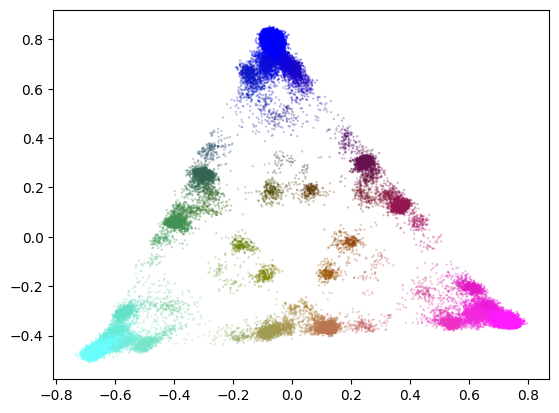

In [209]:
pred_pca = PCA(n_components=5).fit(pred_s)
Z = pred_pca.transform(pred_s) 
plt.scatter(Z[:, 0], Z[:, 1], s=2.0, c=tri_colors, marker='.')

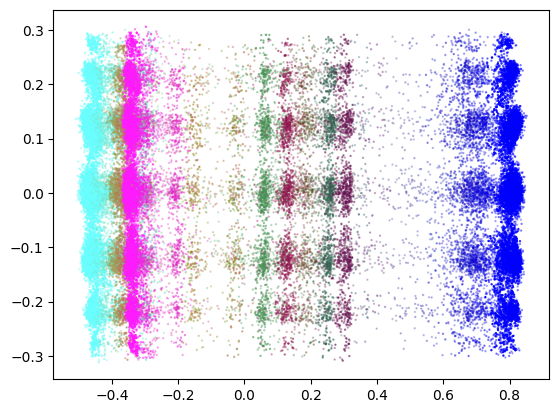

In [210]:
plt.scatter(Z[:, 1], Z[:, 2], s=2.0, c=tri_colors, marker='.')

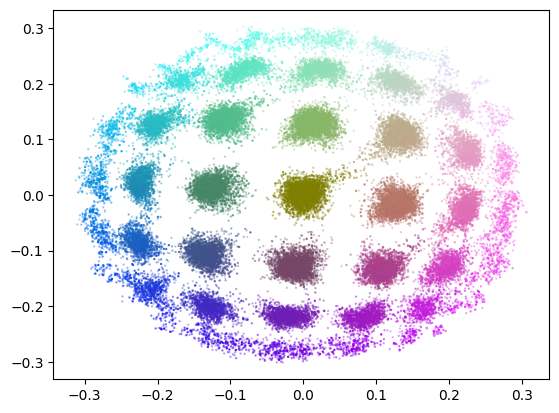

In [212]:
plt.scatter(Z[:, 2], Z[:, 3], s=2.0, c=b_colors, marker='.')